In [1]:
# Import files
import pandas as pd
from datetime import datetime, timedelta
import multiprocessing as mp
from functools import partial
import csv
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import time
import multiprocessing as mp
from functools import partial
import copy
from decimal import Decimal
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta, datetime
import timeit
from functools import partial, reduce
from sklearn import preprocessing # normalize the data
import math
from math import ceil

# Machine learning package
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from operator import itemgetter
from itertools import *
from matplotlib.lines import Line2D
import ruptures as rpt

In [2]:
from __future__ import division
import bayesian_changepoint_detection.generate_data as gd
import cProfile
import seaborn
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial


from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import hdbscan
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope

import math
from itertools import repeat

Use scipy logsumexp().


In [3]:
# Initial setting
path_drive = 'E:/AFC-2016/March/'
path_save = 'E:/Anomaly detection data/20163/'
result_save = 'C:/Users/Tenyu/Desktop/Progress report (Sep, 22th, 2020)/reusult/'
# path_drive = 'C:/Users/Tenyu/Desktop/March/'
start_time_sys = 6
end_time_sys = 22
ratio = 12


# Passenger accumulation
day_set_result = []

# Generate days for a month
# Select month and day
month, year = 8, 2016
day = timedelta(days=1)
date1 = datetime(year, month, 1)
d = date1
day_set = []
while d.month == month:
    day_set.append(d.strftime('%Y-%m-%d'))
    d += day

In [3]:
# Brekpoints summary
# (1) define the incident_log date

def incident_log(inc_log_path):
# Organize the incident log for analysis (New: June 2020)

    # Oorganize the incident log 
    inc_log = pd.read_csv(inc_log_path+ 'Inciden_log_12_18' + '.csv', encoding='cp1252')
    inc_log['Event Date Time'] = pd.to_datetime(inc_log['Event Date Time'])
    a = pd.to_datetime(inc_log['Event Date Time'], format='%d/%m/%Y %H:%M:%S').dt.hour
    b = pd.to_datetime(inc_log['Event Date Time'], format='%d/%m/%Y %H:%M:%S').dt.minute/60
    inc_log['Time'] = a + b



    # Select line, date and Delay duration
    start_time_sys = 6
    end_time_sys = 22
    # select_line = 'EAL'
    exclude_line = ['LRL', 'AEL', 'DRL'] # Exclude light line, airport line and disney line
    min_delay = 10

    # inc_log = inc_log[inc_log['All Lines'] == select_line]
    inc_log = inc_log[~inc_log['All Lines'].isin(exclude_line)]
    inc_log['Operating Day'] = pd.to_datetime(inc_log['Operating Day'])
    inc_log = inc_log[(inc_log['Operating Day'].dt.year == year) & (inc_log['Operating Day'].dt.month == month)]

    inc_log = inc_log[inc_log['Accumulate Delay'] >= min_delay]
    
    if len(inc_log) == 0:
        return 'None'
    else:
        # inc_log['date'] = pd.to_datetime(inc_log['date'], errors='coerce')
        inc_log['date'] = pd.to_datetime(inc_log['Operating Day'])
        # inc_log['date']= inc_log['date'].apply(lambda x: x.strftime('%Y-%m-%d')) # This can change datetime to srting
        # inc_log = inc_log[inc_log['date'] == day_set[0][6:]]
        # inc_log = inc_log[inc_log['date'] == '2016-08-10']
        inc_log['End_time'] = inc_log['Time'] + inc_log['Accumulate Delay']/60

        # Start time interval
        inc_log['a'] = (inc_log['Time']-inc_log['Time'].astype(int))[0:]

        def label_race (row):
               if 0 <= row['a'] < 1/12:
                  return 0
               if 1/12 <= row['a'] < 2/12 :
                  return 1/12
               if 2/12 <= row['a'] < 3/12: 
                  return 2/12
               if 3/12 <= row['a'] < 4/12:
                  return 3/12
               if 4/12 <= row['a'] < 5/12:
                  return 4/12
               if 5/12 <= row['a'] < 6/12:
                  return 5/12
               if 6/12 <= row['a'] < 7/12:
                  return 6/12
               if 7/12 <= row['a'] < 8/12:
                  return 7/12
               if 8/12 <= row['a'] < 9/12:
                  return 8/12
               if 9/12 <= row['a'] < 10/12:
                  return 9/12
               if 10/12 <= row['a'] < 11/12:
                  return 10/12
               if 11/12 <= row['a'] < 12/12:
                  return 11/12
               return 0


        inc_log['c'] = inc_log.apply(lambda row: label_race(row), axis=1)
        inc_log['b'] = inc_log['Time'].astype(int)[0:]
        inc_log['Time'] = inc_log['b'] + inc_log['c']
        inc_log['Time'] = inc_log['Time'].round(decimals=3)

        # End time interval
        inc_log['a'] = (inc_log['End_time']-inc_log['End_time'].astype(int))[0:]
        inc_log['c'] = inc_log.apply(lambda row: label_race(row), axis=1)
        inc_log['b'] = inc_log['End_time'].astype(int)[0:]
        inc_log['End_time'] = inc_log['b'] + inc_log['c']
        inc_log['End_time'] = inc_log['End_time'].round(decimals=3)


        # Time and Line constraint
        inc_log = inc_log[(inc_log['Time'] >= start_time_sys) & (inc_log['Time'] <= end_time_sys)]
        # inc_log = inc_log[inc_log['All Lines'] == 'EAL']


        # Select weekday or weekend
        week_of_day = [0,1,2,3,4] # weekday
        weekend_day = [5,6]
        inc_log['week_of_day'] = inc_log['date'].dt.weekday

        inc_log_week = inc_log[inc_log['week_of_day'].isin(week_of_day)]
        inc_log_weekend = inc_log[inc_log['week_of_day'].isin(weekend_day)]

        return inc_log, inc_log_week, inc_log_weekend
        # return inc_log

In [4]:
# (2) Definedataset
#     a = [date_obj.strftime('%Y-%m-%d') for date_obj in list(inc_log_week['date'])]
#     b = [date_obj.strftime('%Y-%m-%d') for date_obj in list(inc_log_weekend['date'])]
#     week_of_day = [0,1,2,3,4] # weekday
#     weekend_day = [5,6]


def data_generation_4(feature, path_save, year, month, a, b, inc_log):
    df_line, normal_day_all = [], []
    for i, line_sel, inc_day in zip(inc_log['week_of_day'], inc_log['All Lines'], inc_log['date']):
        if i in [5,6]:
            b_1 = inc_day.strftime('%Y-%m-%d')
            
            
            # (1)
            # incident day
            df_tt_sys = pd.read_csv(path_save + 'tt_sys_' + str(year) + str(month) + '.csv')
            day_set_col = ['Time'] + day_set
            df_tt_sys.columns = day_set_col
            df_tt_inc = df_tt_sys[['Time', b_1]]
            
            # normal_day
            inc_weekend_2 = set(b)
            nor_weekend_3 = list(set(day_set) - inc_weekend_2)

            tt_1 = pd.DataFrame({'date': nor_weekend_3})
            tt_1['date'] = pd.to_datetime(tt_1['date'],format='%Y-%m-%d')
            tt_1['date'] = pd.to_datetime(tt_1['date'], errors='coerce')
            tt_1['index'] = tt_1['date'].dt.weekday
            tt_1 = tt_1[tt_1['index'].isin(weekend_day)]
            nor_list_tt = list(tt_1['date'])
            nor_weekend = [s.strftime('%Y-%m-%d') for s in nor_list_tt]


            nor_weekend = ['Time'] + nor_weekend
            df_tt_nor = df_tt_sys.loc[:, nor_weekend]
            df_tt_nor['ave_tt_sys'] = df_tt_nor.iloc[:, 1:].median(axis=1)
            df_tt_nor1 = df_tt_nor[['Time', 'ave_tt_sys']]
        

            df_tt_all = pd.merge(df_tt_inc, df_tt_nor1, on='Time', how='left')
            df_tt_all.columns = ['Time', 'inc_tt_sys', 'nor_tt_sys']
            df_tt_all['Time'] = df_tt_all['Time'].round(decimals=2)
            
            
            # (2)
            # incident day
            df_acc = pd.read_csv(path_save + 'acc_num_' + str(year) + str(month) + '.csv')
            # day_set_col = ['Time'] + day_set
            df_acc.columns = day_set_col
            df_acc_inc = df_acc[['Time', b_1]]

            # normal_day
            # inc_weekend_2 = set(b)
            # nor_weekend_3 = list(set(day_set) - inc_weekend_2)

#             test = pd.DataFrame({'date': nor_weekend_3})
#             test['date'] = pd.to_datetime(test['date'],format='%Y-%m-%d')
#             test['date'] = pd.to_datetime(test['date'], errors='coerce')
#             test['index'] = test['date'].dt.weekday
#             test = test[test['index'].isin(weekend_day)]
#             nor_list_2 = list(test['date'])
#             nor_weekend = [date_obj.strftime('%Y-%m-%d') for date_obj in nor_list_2]


#             nor_weekend_1 = ['Time'] + nor_weekend
            df_acc_nor = df_acc.loc[:, nor_weekend]
            df_acc_nor['ave_acc_pax'] = df_acc_nor.iloc[:, 1:].median(axis=1)
            df_acc_nor1 = df_acc_nor[['Time', 'ave_acc_pax']]

            df_acc_all = pd.merge(df_acc_inc, df_acc_nor1, on='Time', how='left')
            df_acc_all.columns = ['Time', 'inc_acc_sys', 'nor_acc_sys']
            df_acc_all['Time'] = df_acc_all['Time'].round(decimals=2)



            # (3)
            df_ave_tt = pd.read_csv(path_save + line_sel + '_' + str(year) + str(month) + '.csv')
            df_ave_tt.columns =  day_set_col

            # normal day
            df_ave_tt_nor = df_ave_tt.loc[:, nor_weekend]
            df_ave_tt_nor['ave_tt'] = df_ave_tt_nor.iloc[:, 1:].median(axis=1)
            df_ave_tt_nor1 = df_ave_tt_nor[['Time', 'ave_tt']]

            # incident day
            df_ave_tt_inc = df_ave_tt[['Time', b_1]]   

            # merge
            df_ave_tt_all = pd.merge(df_ave_tt_inc, df_ave_tt_nor1, on='Time', how='left')
            df_ave_tt_all.columns = ['Time', 'inc_ave_tt', 'nor_ave_tt']
            df_ave_tt_all['Time'] = df_ave_tt_all['Time'].round(decimals=2)



            # (4)
            df_line_acc = pd.read_csv(path_save + 'line_' + line_sel + '.csv')
            df_line_acc.columns =  day_set_col

            # normal day
            df_line_acc_nor = df_line_acc.loc[:, nor_weekend]
            df_line_acc_nor['line_acc'] = df_line_acc_nor.iloc[:, 1:].median(axis=1)
            df_line_acc_nor1 = df_line_acc_nor[['Time', 'line_acc']]

            # incident day
            df_line_acc_inc = df_line_acc[['Time', b_1]]

            # merge
            df_line_acc_all = pd.merge(df_line_acc_inc, df_line_acc_nor1, on='Time', how='left')
            df_line_acc_all.columns = ['Time', 'inc_acc_line', 'nor_acc_line']
            df_line_acc_all['Time'] = df_line_acc_all['Time'].round(decimals=2)



            # (5)
            df_line_exit = pd.read_csv(path_save + line_sel + '_exit' + '.csv')
            df_line_exit.columns =  day_set_col

            # normal day
            df_line_exit_nor = df_line_exit.loc[:, nor_weekend]
            df_line_exit_nor['line_exit'] = df_line_exit_nor.iloc[:, 1:].median(axis=1)
            df_line_exit_nor1 = df_line_exit_nor[['Time', 'line_exit']]

            # incident day
            df_line_exit_inc = df_line_exit[['Time', b_1]]

            
            # merge
            df_line_exit_all = pd.merge(df_line_exit_inc, df_line_exit_nor1, on='Time', how='left')
            df_line_exit_all.columns = ['Time', 'inc_line_exit', 'nor_line_exit']
            df_line_exit_all['Time'] = df_line_exit_all['Time'].round(decimals=2)



            # Merge all attibutes
            data_frames = [df_tt_all, df_acc_all, df_ave_tt_all, df_line_acc_all, df_line_exit_all]
            df_all = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='left'), data_frames)




            # (Difference between normal and incident days)
            df_all['TT_DIFF'] = df_all['inc_tt_sys'] - df_all['nor_tt_sys']
            df_all['ACC_DIFF'] = df_all['inc_acc_sys'] - df_all['nor_acc_sys']
            df_all['TT_LINE_DIFF'] = df_all['inc_ave_tt'] - df_all['nor_ave_tt']
            df_all['ACC_LINE_DIFF'] = df_all['inc_acc_line'] - df_all['nor_acc_line']
            df_all['EXIT_PAX_DIFF'] = df_all['inc_line_exit'] - df_all['nor_line_exit']
            
            # (Ratio between normal and incident days)
            df_all['TT_RATIO'] = df_all['inc_tt_sys']/df_all['nor_tt_sys']
            df_all['ACC_RATIO'] = df_all['inc_acc_sys']/df_all['nor_acc_sys']
            df_all['TT_LINE_RATIO'] = df_all['inc_ave_tt']/df_all['nor_ave_tt']
            df_all['ACC_LINE_RATIO'] = df_all['inc_acc_line']/df_all['nor_acc_line']
            df_all['EXIT_PAX_RATIO'] = df_all['inc_line_exit']/df_all['nor_line_exit']
            
            
            # Merge all normal days and incident day
            # Possible feature = ['TT_DIFF', 'ACC_DIFF', 'TT_LINE', 'ACC_LINE', 'EXIT_PAX']
            if feature == 'TT_DIFF' or feature == 'TT_RATIO':
                df_n_all = pd.merge(df_tt_inc, df_tt_nor, on='Time', how='left')
            elif feature == 'ACC_DIFF' or feature == 'ACC_RATIO':
                df_n_all = pd.merge(df_acc_inc, df_acc_nor, on='Time', how='left')
            elif feature == 'TT_LINE_DIFF' or feature == 'TT_LINE_RATIO':
                df_n_all = pd.merge(df_ave_tt_inc, df_ave_tt_nor, on='Time', how='left')
            elif feature == 'ACC_LINE_DIFF' or feature == 'ACC_LINE_RATIO':
                df_n_all = pd.merge(df_line_acc_inc, df_line_acc_nor, on='Time', how='left')
            elif feature == 'EXIT_PAX_DIFF' or feature == 'EXIT_PAX_RATIO':
                df_n_all = pd.merge(df_line_exit_inc, df_line_exit_nor, on='Time', how='left')
                
                
        else:
            a_1 = inc_day.strftime('%Y-%m-%d')

            # (1)
            # incident day
            df_tt_sys = pd.read_csv(path_save + 'tt_sys_' + str(year) + str(month) + '.csv')
            day_set_col = ['Time'] + day_set
            df_tt_sys.columns = day_set_col
            df_tt_inc = df_tt_sys[['Time', a_1]]
            
            # normal_day
            inc_week_2 = set(a)
            nor_week_3 = list(set(day_set) - inc_week_2)

            tt_1 = pd.DataFrame({'date': nor_week_3})
            tt_1['date'] = pd.to_datetime(tt_1['date'],format='%Y-%m-%d')
            tt_1['date'] = pd.to_datetime(tt_1['date'], errors='coerce')
            tt_1['index'] = tt_1['date'].dt.weekday
            tt_1 = tt_1[tt_1['index'].isin(week_of_day)]
            nor_list_tt = list(tt_1['date'])
            nor_week = [s.strftime('%Y-%m-%d') for s in nor_list_tt]


            nor_week = ['Time'] + nor_week
            df_tt_nor = df_tt_sys.loc[:, nor_week]
            df_tt_nor['ave_tt_sys'] = df_tt_nor.iloc[:, 1:].median(axis=1)
            df_tt_nor1 = df_tt_nor[['Time', 'ave_tt_sys']]

            df_tt_all = pd.merge(df_tt_inc, df_tt_nor1, on='Time', how='left')
            df_tt_all.columns = ['Time', 'inc_tt_sys', 'nor_tt_sys']
            df_tt_all['Time'] = df_tt_all['Time'].round(decimals=2)
            
            
            # (2)
            # incident day
            df_acc = pd.read_csv(path_save + 'acc_num_' + str(year) + str(month) + '.csv')
            # day_set_col = ['Time'] + day_set
            df_acc.columns = day_set_col
            df_acc_inc = df_acc[['Time', a_1]]

            # normal_day
#             inc_week_2 = set(a)
#             nor_week_3 = list(set(day_set) - inc_week_2)

#             test = pd.DataFrame({'date': nor_week_3})
#             test['date'] = pd.to_datetime(test['date'],format='%Y-%m-%d')
#             test['date'] = pd.to_datetime(test['date'], errors='coerce')
#             test['index'] = test['date'].dt.weekday
#             test = test[test['index'].isin(week_of_day)]
#             nor_list_1 = list(test['date'])
#             nor_week = [date_obj.strftime('%Y-%m-%d') for date_obj in nor_list_1]


            # nor_week_1 = ['Time'] + nor_week
            df_acc_nor = df_acc.loc[:, nor_week]
            df_acc_nor['ave_acc_pax'] = df_acc_nor.iloc[:, 1:].median(axis=1)
            df_acc_nor1 = df_acc_nor[['Time', 'ave_acc_pax']]

            df_acc_all = pd.merge(df_acc_inc, df_acc_nor1, on='Time', how='left')
            df_acc_all.columns = ['Time', 'inc_acc_sys', 'nor_acc_sys']
            df_acc_all['Time'] = df_acc_all['Time'].round(decimals=2)


            # (3)
            df_ave_tt = pd.read_csv(path_save + line_sel + '_' + str(year) + str(month) + '.csv')
            df_ave_tt.columns =  day_set_col

            # normal day
            df_ave_tt_nor = df_ave_tt.loc[:, nor_week]
            df_ave_tt_nor['ave_tt'] = df_ave_tt_nor.iloc[:, 1:].median(axis=1)
            df_ave_tt_nor1 = df_ave_tt_nor[['Time', 'ave_tt']]

            # incident day
            df_ave_tt_inc = df_ave_tt[['Time', a_1]]   

            # merge
            df_ave_tt_all = pd.merge(df_ave_tt_inc, df_ave_tt_nor1, on='Time', how='left')
            df_ave_tt_all.columns = ['Time', 'inc_ave_tt', 'nor_ave_tt']
            df_ave_tt_all['Time'] = df_ave_tt_all['Time'].round(decimals=2)



            # (4)
            df_line_acc = pd.read_csv(path_save + 'line_' + line_sel + '.csv')
            df_line_acc.columns =  day_set_col

            # normal day
            df_line_acc_nor = df_line_acc.loc[:, nor_week]
            df_line_acc_nor['line_acc'] = df_line_acc_nor.iloc[:, 1:].median(axis=1)
            df_line_acc_nor1 = df_line_acc_nor[['Time', 'line_acc']]

            # incident day
            df_line_acc_inc = df_line_acc[['Time', a_1]]

            # merge
            df_line_acc_all = pd.merge(df_line_acc_inc, df_line_acc_nor1, on='Time', how='left')
            df_line_acc_all.columns = ['Time', 'inc_acc_line', 'nor_acc_line']
            df_line_acc_all['Time'] = df_line_acc_all['Time'].round(decimals=2)



            # (5)
            df_line_exit = pd.read_csv(path_save + line_sel + '_exit' + '.csv')
            df_line_exit.columns =  day_set_col

            # normal day
            df_line_exit_nor = df_line_exit.loc[:, nor_week]
            df_line_exit_nor['line_exit'] = df_line_exit_nor.iloc[:, 1:].median(axis=1)
            df_line_exit_nor1 = df_line_exit_nor[['Time', 'line_exit']]

            # incident day
            df_line_exit_inc = df_line_exit[['Time', a_1]]

            # merge
            df_line_exit_all = pd.merge(df_line_exit_inc, df_line_exit_nor1, on='Time', how='left')
            df_line_exit_all.columns = ['Time', 'inc_line_exit', 'nor_line_exit']
            df_line_exit_all['Time'] = df_line_exit_all['Time'].round(decimals=2)



            
            # Merge all variables
            data_frames = [df_tt_all, df_acc_all, df_ave_tt_all, df_line_acc_all, df_line_exit_all]
            df_all = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='left'), data_frames)

            # (Difference between normal and incident days)
            df_all['TT_DIFF'] = df_all['inc_tt_sys'] - df_all['nor_tt_sys']
            df_all['ACC_DIFF'] = df_all['inc_acc_sys'] - df_all['nor_acc_sys']
            df_all['TT_LINE_DIFF'] = df_all['inc_ave_tt'] - df_all['nor_ave_tt']
            df_all['ACC_LINE_DIFF'] = df_all['inc_acc_line'] - df_all['nor_acc_line']
            df_all['EXIT_PAX_DIFF'] = df_all['inc_line_exit'] - df_all['nor_line_exit']
            
            
            # (Ratio between normal and incident days)
            df_all['TT_RATIO'] = df_all['inc_tt_sys'] - df_all['nor_tt_sys']
            df_all['ACC_RATIO'] = df_all['inc_acc_sys']/df_all['nor_acc_sys']
            df_all['TT_LINE_RATIO'] = df_all['inc_ave_tt']/df_all['nor_ave_tt']
            df_all['ACC_LINE_RATIO'] = df_all['inc_acc_line']/df_all['nor_acc_line']
            df_all['EXIT_PAX_RATIO'] = df_all['inc_line_exit']/df_all['nor_line_exit']         
            
            
            # Merge all normal days and incident day
            # Possible feature = ['TT_DIFF', 'ACC_DIFF', 'TT_LINE', 'ACC_LINE', 'EXIT_PAX']
            if feature == 'TT_DIFF' or feature == 'TT_RATIO':
                df_n_all = pd.merge(df_tt_inc, df_tt_nor, on='Time', how='left')
            elif feature == 'ACC_DIFF' or feature == 'ACC_RATIO':
                df_n_all = pd.merge(df_acc_inc, df_acc_nor, on='Time', how='left')
            elif feature == 'TT_LINE_DIFF' or feature == 'TT_LINE_RATIO':
                df_n_all = pd.merge(df_ave_tt_inc, df_ave_tt_nor, on='Time', how='left')
            elif feature == 'ACC_LINE_DIFF' or feature == 'ACC_LINE_RATIO':
                df_n_all = pd.merge(df_line_acc_inc, df_line_acc_nor, on='Time', how='left')
            elif feature == 'EXIT_PAX_DIFF' or feature == 'EXIT_PAX_RATIO':
                df_n_all = pd.merge(df_line_exit_inc, df_line_exit_nor, on='Time', how='left')
                

        # start time and end time selection
        df_all = df_all[(df_all['Time'] >= start_time_sys) & (df_all['Time'] <= end_time_sys)]
        df_n_all = df_n_all[(df_n_all['Time'] >= start_time_sys) & (df_n_all['Time'] <= end_time_sys)]    
        
        # Time columns
        time_col = np.arange(start_time_sys, end_time_sys, 1/ratio).tolist()
        time_columns = pd.DataFrame(time_col, columns=['Time_new'])
        time_columns['Time'] = time_columns['Time_new'].round(decimals=2)
        time_columns['Time_1'] = time_columns['Time_new'].round(decimals=3)

    #         x1 = inc_log['Time'].tolist()[i]
    #         x2 = inc_log['End_time'].tolist()[i]
        
        # Normal and incident
        df_all = pd.merge(time_columns, df_all, on='Time', how='left')
        del df_all['Time']
        del df_all['Time_new']
        df_all = df_all.rename(columns={'Time_1': 'Time'})

        # fill in wtih median value
        df_all = df_all.fillna(df_all.median())
        df_n_all = df_n_all.fillna(df_n_all.median())
    #         train_st.append(x1)
    #         train_end.append(x2)

        df_line.append(df_all)
        
        # Normal dall for all and the incident day
        normal_day_all.append(df_n_all)

        
    return df_line, normal_day_all

In [5]:
def breakpoint_per(n_bkp, model_1, width, df, x1, x2):
    
    # Piecewise method
    np.random.seed(123)
    x = np.array(df['Time'])
    # x = [float(item) for item in x]
    y = np.array(df[feature])
    
    my_pwlf = pwlf.PiecewiseLinFit(x, y)

    # fit the data for four line segments
    # this performs 3 multi-start optimizations
    
    # n_bkp+1 = breakpoint line
    res = my_pwlf.fitfast(n_bkp+1, pop=3)

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    # plot the results
    plt.rcParams["figure.figsize"] = (10,8)
    bkp_piecewise = [round(i, 2) for i in list(res)[1:-1]]
    for k in bkp_piecewise:
        plt.axvline(k, color='red')
    custome_lines = [Line2D([0], [0], color='red', lw=2, label='break point'),
                 Line2D([0], [0], color='black', lw=2, label='train delay start/end')]
    plt.legend(handles=custome_lines, loc='best')
    plt.plot(x, y)
    plt.plot(xHat, yHat, '-', color='green')
    plt.axvline(x1, color='black')
    plt.axvline(x2, color='black')
    plt.xlim(start_time_sys, end_time_sys)
    plt.ylim(-1000, 15000)
    plt.xlabel('Time', size=14)
    plt.ylabel('Difference of an attribute (Incident-Normal)', size=14)
    plt.title('Change Point Detection: Piecewise Method', size=16)
    plt.xticks(size=14)
    plt.yticks(size=14)
    # plt.savefig(result_save + 'piecewise' + '_' + str(x1)  + '.png')
    plt.show()
    
    
    # Window-based method
    # Apply moving window
    signal = np.array(df[feature])
    algo = rpt.Window(width=width, min_size=2,model=model_1).fit(signal)
    my_bkps = algo.predict(n_bkps=n_bkp)

    # show results
    plt.figure(figsize=(10, 8))
    plt.plot(df['Time'], df[feature])

    bkp_window = []
    for i in my_bkps[:-1]:
        x = df.loc[i-1][0]
        bkp_window.append(x)
        plt.axvline(x, color='red')
    custome_lines = [Line2D([0], [0], color='red', lw=2, label='break point'),
                 Line2D([0], [0], color='black', lw=2, label='train delay start/end')]
    plt.legend(handles=custome_lines, loc='best')
    plt.axvline(x1, color='black')
    plt.axvline(x2, color='black')
    plt.xlim(start_time_sys, end_time_sys)
    plt.ylim(-1000, 15000)
    plt.xlabel('Time', size=14)
    plt.ylabel('Difference of an attribute (Incident-Normal)', size=14)
    plt.title('Change Point Detection: Window_based Method', size=16)
    plt.xticks(size=14)
    plt.yticks(size=14)
    # plt.savefig(result_save + 'window_based' + '_' + str(x1)  + '.png')
    plt.show()
    
    return bkp_piecewise, bkp_window

In [16]:
def breakpoint_anomaly(n_bkp, model_1, width, df, x1, x2):
    
    # Piecewise method
    np.random.seed(123)
    x = np.array(df['Time'])
    # x = [float(item) for item in x]
    y = np.array(df[feature])
    
    my_pwlf = pwlf.PiecewiseLinFit(x, y)

    # fit the data for four line segments
    # this performs 3 multi-start optimizations
    
    # n_bkp+1 = breakpoint line
    res = my_pwlf.fitfast(n_bkp+1, pop=3)

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    # plot the results
    plt.rcParams["figure.figsize"] = (10, 6)
    bkp_piecewise = [round(i, 2) for i in list(res)[1:-1]]
    for k in bkp_piecewise:
        plt.axvline(k, color='red')
    custome_lines = [Line2D([0], [0], color='red', lw=2, label='break point'),
                 Line2D([0], [0], color='black', lw=2, label='train delay start/end')]
    plt.legend(handles=custome_lines, loc='best')
    plt.plot(x, y)
    plt.plot(xHat, yHat, '-', color='green')
    plt.axvline(x1, color='black')
    plt.axvline(x2, color='black')
    plt.xlim(start_time_sys, end_time_sys)
    # plt.ylim(-1000, 15000)
    plt.xlabel('Time', size=14)
    plt.ylabel('Difference of an attribute (Incident-Normal)', size=14)
    plt.title('Change Point Detection: Piecewise Method', size=16)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.savefig(res_p + 'piecewise' + '_' + str(x1)  + '.png')
    plt.show()
    
    return bkp_piecewise

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


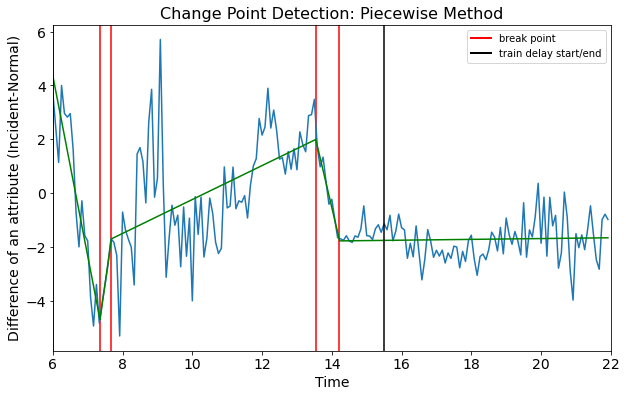

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


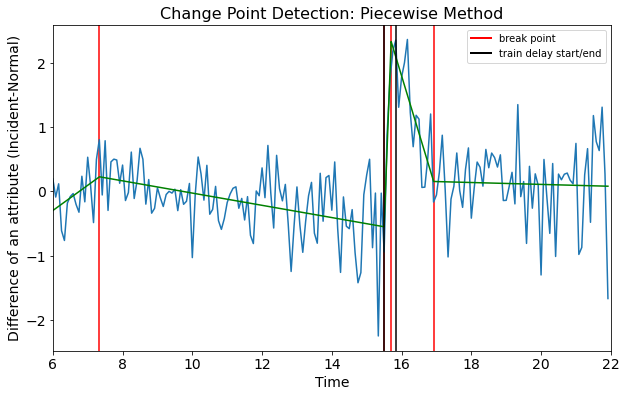

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


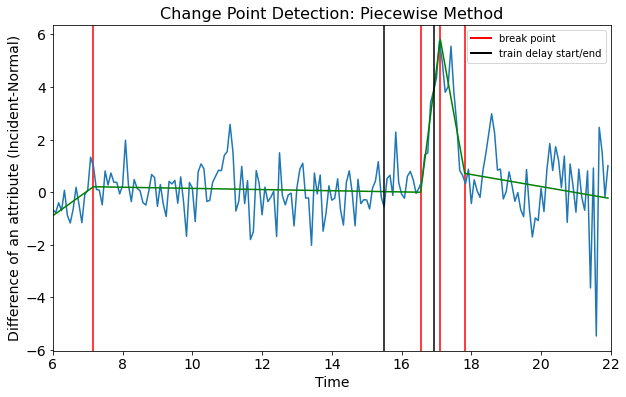

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


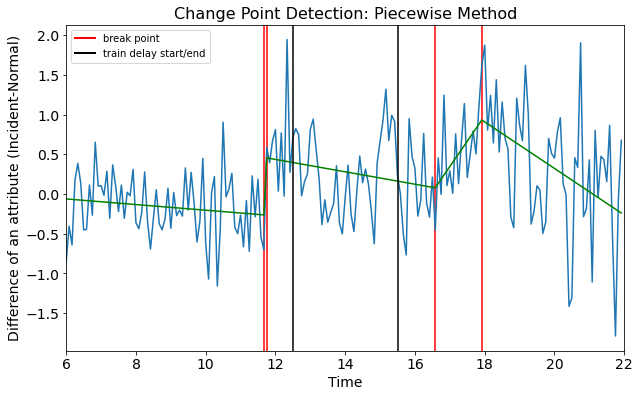

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


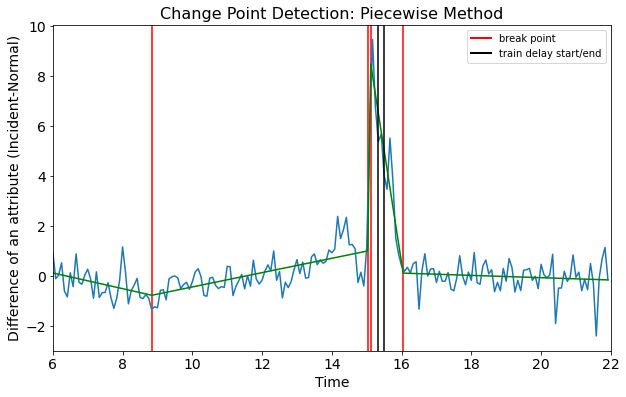

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


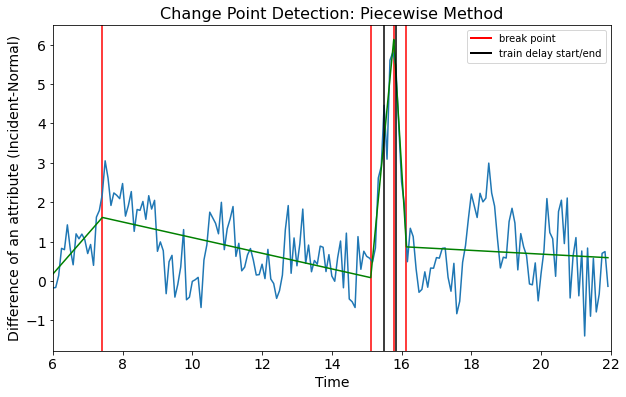

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


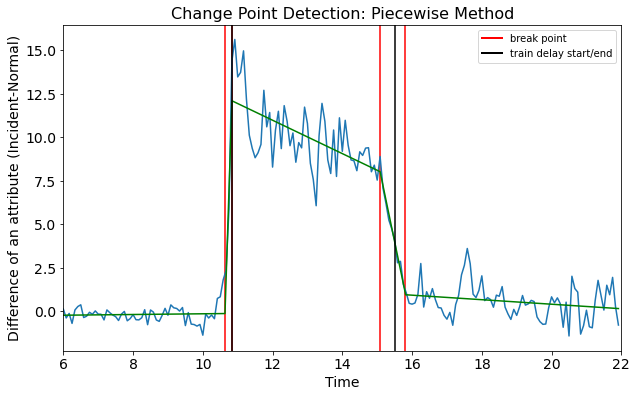

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


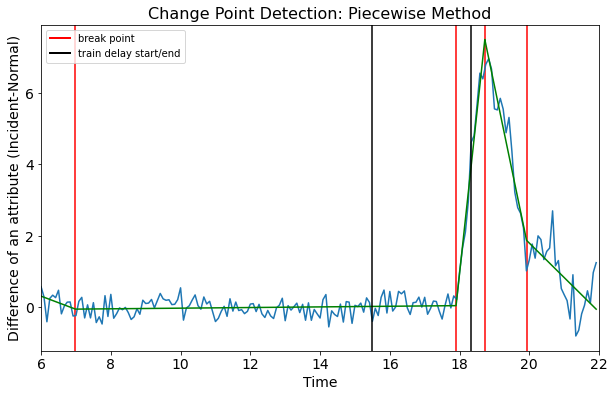

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


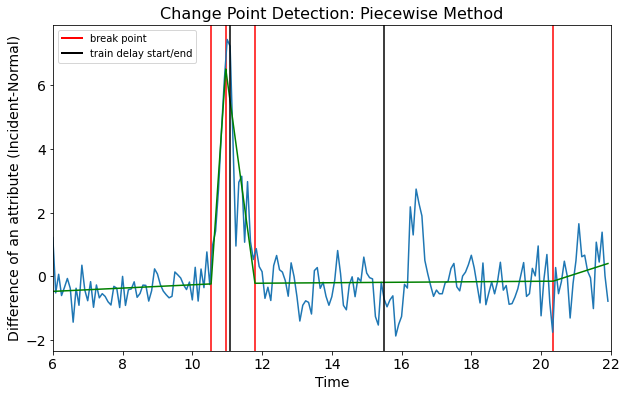

In [76]:
import numpy.polynomial.polynomial as npoly
from scipy import optimize
from numpy.polynomial import polynomial as P
import pwlf
np.random.seed(123)

## Anomaly detection using 
file_p = 'E:/Anomaly detection data/'
path_inc = 'E:/Anomaly detection data/'
result_p = 'C:/Users/Tenyu/Desktop/Progress report (Oct, 1st, 2020)/beakpoint_bk/'


start_time_sys = 6
end_time_sys = 22
ratio = 12

n_bkp = 4
model_1 = 'l1'
width = 6

# "l1"  # "l1", "rbf", "linear", "normal", "ar"

# feature_list = ['ACC_DIFF', 'ACC_RATIO', 'ACC_LINE_DIFF', 'ACC_LINE_RATIO']
# [df_tt_nor, df_acc_nor, df_ave_tt_nor, df_line_acc_nor, df_line_exit_nor]

feature_list = ['TT_DIFF', 'TT_RATIO', 'TT_LINE_DIFF', 'TT_LINE_RATIO']
# feature_list = ['TT_LINE_DIFF']
year_list, month_list  = [2016]*4, [1,3,4,5]

feature_each = []
for feature in feature_list:
    bkp_model = []
    for year, month in zip(year_list, month_list):
        path_save = path_inc + str(year) + str(month) +'/'

        day = timedelta(days=1)
        date1 = datetime(year, month, 1)
        d = date1
        day_set = []
        while d.month == month:
            day_set.append(d.strftime('%Y-%m-%d'))
            d += day

        inc_1 = incident_log(file_p)
        # inc_1[0].to_csv(result_save + 'inc_description.csv') 
        


        
        if inc_1 == 'None':
            continue
        else:
            a = [date_obj.strftime('%Y-%m-%d') for date_obj in list(inc_1[1]['date'])]
            b = [date_obj.strftime('%Y-%m-%d') for date_obj in list(inc_1[2]['date'])]
            week_of_day = [0,1,2,3,4] # weekday
            weekend_day = [5,6]
            
            dataset_all = data_generation_4(feature, path_save, year, month, a, b, inc_1[0])
            dataset = dataset_all[0]
            normal_day_a = dataset_all[1]
         
            only_data, result_piecewise, result_anomaly, train_s, train_e, all_bkp_each = [], [], [], [], [], []
            for i in list(range(0, len(dataset))):   
                df = dataset[i][(dataset[i]['Time'] >= start_time_sys) & (dataset[i]['Time'] <= end_time_sys)]
                only_data.append(df)
                x1 = inc_1[0]['Time'].tolist()[i]
                x2 = inc_1[0]['End_time'].tolist()[i]
                # x2 = 19.67
                # x2 = 15.5
                train_s.append(x1)
                train_e.append(x2)
                
                s = breakpoint_anomaly(n_bkp, model_1, width, df, x1, x2)
                all_bkp_each.append(s)
                result_piecewise.append(s[0])
                result_anomaly.append(s[1])

In [77]:
# Probability of each breakpoint
res_p = 'C:/Users/Tenyu/Desktop/Progress report (Oct, 8th, 2020)/result/'

i = 6
x1 = train_s[i]
bkp_lst = all_bkp_each[i]
print(bkp_lst)

df_prob = normal_day_a[i]
time_lst = [round(x, 2) for x in list(df_prob['Time'])]

def closest(lst, K): 
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

# Find the nearest time in time column
updata_bkp_lst = [] 
for i in range(0, len(bkp_lst)):
    a = closest(time_lst, bkp_lst[i])
    updata_bkp_lst.append(a)
    
index_lst = []
for i_1 in range(0, len(updata_bkp_lst)):
    ind = time_lst.index(updata_bkp_lst[i_1])
    index_lst.append(ind)

interval_15 = []
for t in index_lst:
    if t == 0:
        j = [time_lst [t], time_lst [t+1], time_lst[t+2]]
    else:
        j = [time_lst[t-1], time_lst[t], time_lst[t+1]]
        interval_15.append(j)

prob_result = []
df_prob['Time_2'] = df_prob['Time'].round(decimals=2)
for lst_v in range(0, len(interval_15)):
    y = df_prob[df_prob['Time_2'].isin(interval_15[lst_v])]
    test = y.iloc[:, 2:-2]
    kana = []
    for col in test.columns:
        p = test[col].tolist()
        kana.append(p)

    import itertools
    data = list(itertools.chain(*kana))


    from scipy.stats import norm
    mu, std = norm.fit(data)

    import scipy.stats
    # To find the probability that the variable has a value GREATER than or
    p = scipy.stats.norm(mu, std).sf(y.iat[1,1])
    prob_result.append(p)
    
p1 = pd.DataFrame(data = {'Probability':prob_result, 'Breakpoint_time': bkp_lst})
p1.to_csv(res_p + 'prob_' + str(x1) +'.csv')
p1
    





[10.64, 10.83, 15.08, 15.81]


,Probability,Breakpoint_time
0,3.390461e-05,10.64
1,1.735708e-136,10.83
2,1.557745e-61,15.08
3,1.822082e-01,15.81


In [156]:
i = 8
bkp_lst = all_bkp_each[i]
print(bkp_lst)

df_prob = normal_day_a[i]
time_lst = [round(x, 2) for x in list(df_prob['Time'])]

[10.5, 10.87, 11.61, 19.33]


In [157]:
def closest(lst, K): 
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

# Find the nearest time in time column
updata_bkp_lst = [] 
for i in range(0, len(bkp_lst)):
    a = closest(time_lst, bkp_lst[i])
    updata_bkp_lst.append(a)
updata_bkp_lst

[10.5, 10.83, 11.58, 19.33]

In [166]:
index_lst = []
for i_1 in range(0, len(updata_bkp_lst)):
    ind = time_lst.index(updata_bkp_lst[i_1])
    index_lst.append(ind)

interval_15 = []
for t in index_lst:
    if t == 0:
        j = [time_lst [t], time_lst [t+1], time_lst[t+2]]
    else:
        j = [time_lst[t-1], time_lst[t], time_lst[t+1]]
        interval_15.append(j)

df_prob['Time_2'] = df_prob['Time'].round(decimals=2)
for lst_v in range(0, len(interval_15)):
    y = df_prob[df_prob['Time_2'].isin(interval_15[lst_v])]
    test = y.iloc[:, 2:-2]
    kana = []
    for col in test.columns:
        p = test[col].tolist()
        kana.append(p)

    import itertools
    data = list(itertools.chain(*kana))


    from scipy.stats import norm
    mu, std = norm.fit(data)

    import scipy.stats
    # To find the probability that the variable has a value GREATER than or
    p = scipy.stats.norm(mu, std).sf(y.iat[1,1])
    print(p)



0.7466735797985986
3.63969871018439e-06
0.14147022715141422
0.7582874982723382


In [162]:
# Incident day
y

,Time,2016-08-30,2016-08-19,2016-08-05,2016-08-15,2016-08-01,2016-08-04,2016-08-17,2016-08-11,2016-08-31,2016-08-08,2016-08-23,2016-08-16,2016-08-10,2016-08-24,2016-08-18,2016-08-29,ave_tt_sys,Time_2
171,19.250,21.753806,22.273113,21.790275,22.571662,23.316622,21.989588,22.039846,22.236676,22.231014,22.027585,22.358340,22.194662,22.107496,21.631470,21.994423,21.923211,22.107496,19.25
172,19.334,21.848573,22.233530,21.824081,22.433022,23.349646,21.931149,21.951616,21.959580,22.222521,22.334433,22.485245,22.003244,21.728064,21.705432,22.140316,21.796812,22.003244,19.33
173,19.417,21.687500,21.955583,21.963119,22.257071,22.872801,21.746161,22.201583,21.779879,21.852363,21.937596,21.946631,22.125979,21.719747,21.724184,21.958489,21.903777,21.946631,19.42


In [165]:
y.iat[1,1]

21.84857259038657

In [142]:
test = y.iloc[:, 2:-2]
kana = []
for col in test.columns:
    p = test[col].tolist()
    kana.append(p)

import itertools
data = list(itertools.chain(*kana))


from scipy.stats import norm
mu, std = norm.fit(data)

import scipy.stats
# To find the probability that the variable has a value GREATER than or
p = scipy.stats.norm(mu, std).sf(y.iat[0,2])
p

0.2603415649079862

C:\Users\Tenyu\Anaconda3\lib\site-packages\pwlf\pwlf.py:1109: RuntimeWarning: invalid value encountered in double_scalars
  (self.fit_breaks[i+1]-self.fit_breaks[i])


[8.83, 15.03, 15.11, 16.04]
15.333


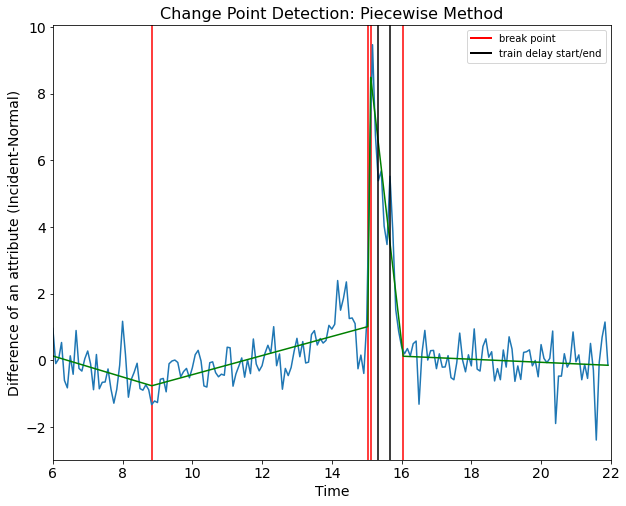

In [14]:
# Algorithm to detect the best breakpoint in Piecewise method

save_rec_t = 'C:/Users/Tenyu/Desktop/Progress report (Oct, 8th, 2020)/'
i = 4

np.random.seed(123)
df = only_data[i]
x1 = train_s[i]
x2 = train_e[i]
n_bkp = 4

feature = 'TT_LINE_DIFF'

x = np.array(df['Time'])
# x = [float(item) for item in x]
y = np.array(df[feature])

my_pwlf = pwlf.PiecewiseLinFit(x, y)
# fit the data for four line segments
# this performs 3 multi-start optimizations

# n_bkp+1 = breakpoint line
res = my_pwlf.fitfast(n_bkp+1, pop=3)

# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.rcParams["figure.figsize"] = (10,8)
bkp_piecewise = [round(i, 2) for i in list(res)[1:-1]]
for k in bkp_piecewise:
    plt.axvline(k, color='red')
custome_lines = [Line2D([0], [0], color='red', lw=2, label='break point'),
             Line2D([0], [0], color='black', lw=2, label='train delay start/end')]
plt.legend(handles=custome_lines, loc='best')
plt.plot(x, y)
plt.plot(xHat, yHat, '-', color='green')
plt.axvline(x1, color='black')
plt.axvline(x2, color='black')
plt.xlim(start_time_sys, end_time_sys)
# plt.ylim(-1000, 15000)
plt.xlabel('Time', size=14)
plt.ylabel('Difference of an attribute (Incident-Normal)', size=14)
plt.title('Change Point Detection: Piecewise Method', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
# plt.savefig(save_rec_t + 'original' + '_' + str(x1)  + '.png')
plt.show

print(bkp_piecewise)
print(x1)

[0.528, -1.755]

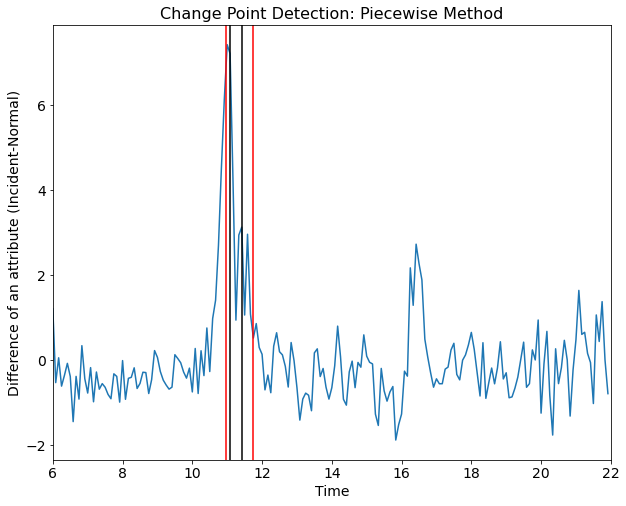

In [341]:
# Disruption impact ending time
boundary = 0.2  # (20%)

def closest(lst, K): 
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]


dis_start = [*filter(lambda x: x <= round(x1, 2), bkp_piecewise)]
if dis_start == []:
    imp_start_t = 'None'
else:
    imp_start_t = max(dis_start)


# Disruption impact starting time
dis_end = [*filter(lambda x: x >= round(x2, 2), bkp_piecewise)]
time_l = [round(s, 2) for s in x]

# Find the nearest time in time column
new_dis_end_l = [] 
for i in range(0, len(dis_end)):
    a = closest(time_l, dis_end[i])
    new_dis_end_l.append(a)

value_l = []
for i in new_dis_end_l:
    s = [round(x,2) for x in list(x)].index(i)
    s1 = round(y[s], 3)
    value_l.append(s1)



import statistics
boun = statistics.median(abs(y))*(1+boundary)
l2 = list(filter(lambda i: -boun <=i <= boun, value_l))

if l2 == []:
    if value_l == []:
        rec_t = 'None'
    else:
        result_index = min(value_l)
        rec_t = list(x)[[round(m, 3) for m in list(y)].index(result_index)]
        # test = [round(m, 3) for m in list(y)]
        # list(x)[[i for i, x in enumerate(test) if x == l2[0]][-1]]
else:
    result_index = l2[0]
    rec_t = list(x)[[round(m, 3) for m in list(y)].index(result_index)]
    test = [round(m, 3) for m in list(y)]
    list(x)[[i for i, x in enumerate(test) if x == l2[0]][-1]]
    
plt.plot(x, y)

# Impact start time & end time
plt.axvline(imp_start_t, color='red')
plt.axvline(rec_t, color='red')

# Train delay & end time
plt.axvline(x1, color='black')
plt.axvline(x2, color='black')
plt.xlim(start_time_sys, end_time_sys)
# plt.ylim(-1000, 15000)
plt.xlabel('Time', size=14)
plt.ylabel('Difference of an attribute (Incident-Normal)', size=14)
plt.title('Change Point Detection: Piecewise Method', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
# plt.savefig(save_rec_t + 'renewal' + '_' + str(x1)  + '.png')
plt.show

value_l

SyntaxError: invalid syntax (<ipython-input-280-8f8b71d89f97>, line 1)

In [294]:
test = [round(m, 3) for m in list(y)]
list(x)[[i for i, x in enumerate(test) if x == l2[0]][-1]]



16.167

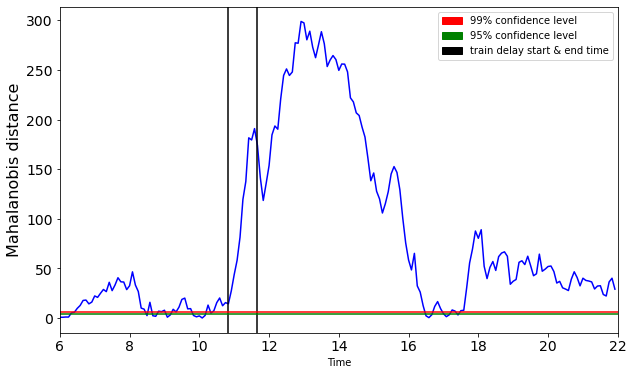

In [66]:
# Using 'Mahalonobis' method for univariate or multivariable factor(s)

# # Mahalanobis-1d in a timely manner
# import pytest
# import numpy as np

# from mahalanobis import Mahalanobis

i = 6
feature = 'TT_DIFF'
test_df = only_data[i]
x1 = train_s[i]
x2 = train_e[i]

x = test_df[feature]
s = np.array(x)
test1 = []
for i1 in s:
    test1.append([i1])
s1 = np.array(test1)       
mah1D = Mahalanobis(s1, 4)
mah_dis = mah1D.distances
mah_col = list(mah_dis[0:, 0])

from scipy.stats import chi2
n1 = 0.01  # level of significance 
n2 = 0.05 
d = 1 # dimension
threshold_1 = chi2.ppf((1-n1), df=d)
threshold_2 = chi2.ppf((1-n2), df=d)
time_col = list(test_df['Time'])

# datafrome
anomaly_result = pd.DataFrame({'Time': time_col, 'Mahalanobis_dis': mah_col})
anomaly_result.plot('Time', y='Mahalanobis_dis', color='blue')

plt.axvline(x1, color='black')
plt.axvline(x2, color='black')
plt.axhline(threshold_1, color='red')
plt.axhline(threshold_2, color='green')
plt.xlim(start_time_sys, end_time_sys)
plt.ylabel('Mahalanobis distance', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

import matplotlib.patches as mpatches
c_1 = mpatches.Patch(color='red', label='99% confidence level')
c_2 = mpatches.Patch(color='green', label='95% confidence level')
c_3 = mpatches.Patch(color='black', label='train delay start & end time')
plt.legend(handles=[c_1, c_2, c_3], loc='upper right')
plt.savefig(save_pic + 'mahalanobis_1d_1' + '_' + str(i)  + '.png')
plt.show()


C:\Users\Tenyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Tenyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Tenyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

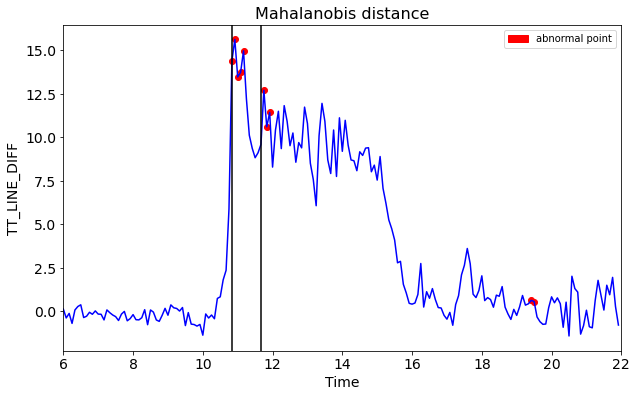

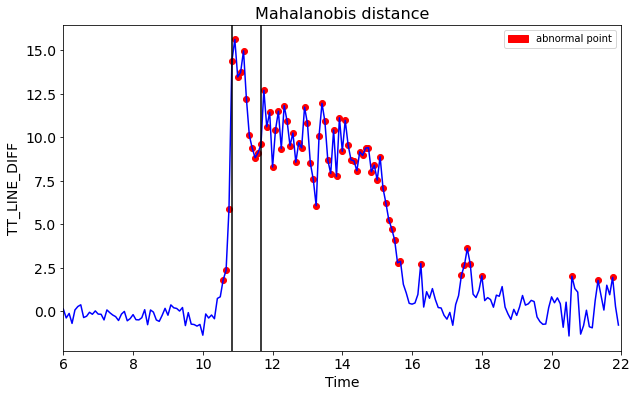

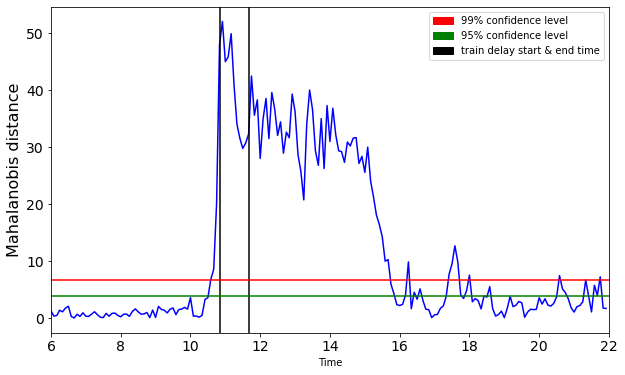

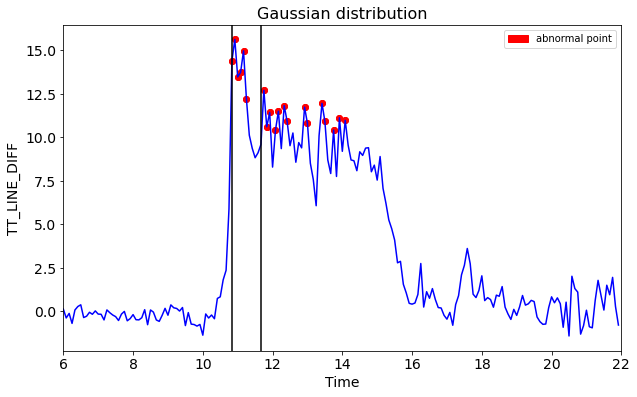

In [102]:
i = 6
feature = 'TT_LINE_DIFF'
test_df = only_data[i]
x1 = train_s[i]
x2 = train_e[i]



# Mahalanobis four dimensions
save_pic = 'C:/Users/Tenyu/Desktop/Progress report (Oct, 1st, 2020)/mahalanobis/'

test_df = test_df[['Time', 'TT_DIFF','TT_LINE_DIFF', 'ACC_DIFF', 'ACC_LINE_DIFF']]
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

col_name = list(test_df.columns)[1:]
test_df['mahalanobis'] = mahalanobis(x=test_df.iloc[:, 1:], data=test_df[col_name])


from scipy.stats import chi2
test_df['p'] = 1 - chi2.cdf(test_df['mahalanobis'], len(col_name)-1)
threshold = 0.01
def p_value (row):
    if 0 <= row['p'] < threshold:
        return 1
    else:
        return 0


test_df['anomaly_result'] = test_df.apply(lambda row: p_value(row), axis=1)
anomaly_result = test_df[['Time', 'anomaly_result']]



df_s = pd.concat([test_df[[feature]], anomaly_result], axis=1)
fig, ax = plt.subplots(figsize=(10,6))
a = df_s.loc[df_s['anomaly_result'] == 1, ['Time', feature]] #anomaly


ax.plot(test_df['Time'], test_df[feature], color='blue', label='Normal')
ax.scatter(a['Time'], a[feature], color='red', label='Anomaly')
plt.xlim(start_time_sys, end_time_sys)
plt.axvline(x1, color='black')
plt.axvline(x2, color='black')
# plt.ylim(-1000, 15000)
plt.xlabel('Time', size=14)
plt.ylabel(str(feature), size=14)
plt.title('Mahalanobis distance', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

legend1 = mpatches.Patch(color='red', label='abnormal point')
plt.legend(handles=[legend1], loc='best')
plt.savefig(save_pic + 'mahalanobis_4d' + '_tt' + str(i)  + '.png')
plt.show()




# Mahalanobis one dimension
x = test_df[feature]
s = np.array(x)
test1 = []
for i1 in s:
    test1.append([i1])
s1 = np.array(test1)       
mah1D = Mahalanobis(s1, 4)
mah_dis = mah1D.distances
mah_col = list(mah_dis[0:, 0])

from scipy.stats import chi2
n = 0.01  # level of significance 
d = 1 # dimension
threshold = chi2.ppf((1-n), df=d)
time_col = list(test_df['Time'])

# datafrome
anomaly_result = pd.DataFrame({'Time': time_col, feature: mah_col})
def chi_value (row):
    if row[feature] > threshold:
        return 1
    else:
        return 0

anomaly_result['anomaly_result'] = anomaly_result.apply(lambda row: chi_value(row), axis=1)
del anomaly_result[feature]
df_s = pd.concat([test_df[[feature]], anomaly_result], axis=1)

fig, ax = plt.subplots(figsize=(10,6))
a = df_s.loc[df_s['anomaly_result'] == 1, ['Time', feature]] #anomaly


ax.plot(test_df['Time'], test_df[feature], color='blue', label='Normal')
ax.scatter(a['Time'], a[feature], color='red', label='Anomaly')
plt.xlim(start_time_sys, end_time_sys)
plt.axvline(x1, color='black')
plt.axvline(x2, color='black')
# plt.ylim(-1000, 15000)
plt.xlabel('Time', size=14)
plt.ylabel(str(feature), size=14)
plt.title('Mahalanobis distance', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

legend1 = mpatches.Patch(color='red', label='abnormal point')
plt.legend(handles=[legend1], loc='best')
plt.savefig(save_pic + 'mahalanobis_1d' + '_tt' + str(i)  + '.png')
plt.show()




# Mahalanobis one dimension with y-axis = distance
x = test_df[feature]
s = np.array(x)
test1 = []
for i1 in s:
    test1.append([i1])
s1 = np.array(test1)       
mah1D = Mahalanobis(s1, 4)
mah_dis = mah1D.distances
mah_col = list(mah_dis[0:, 0])

from scipy.stats import chi2
n1 = 0.01  # level of significance 
n2 = 0.05 
d = 1 # dimension
threshold_1 = chi2.ppf((1-n1), df=d)
threshold_2 = chi2.ppf((1-n2), df=d)
time_col = list(test_df['Time'])


# datafrome
anomaly_result = pd.DataFrame({'Time': time_col, 'Mahalanobis_dis': mah_col})
anomaly_result.plot('Time', y='Mahalanobis_dis', color='blue')

plt.rcParams["figure.figsize"] = (10,6)
plt.axvline(x1, color='black')
plt.axvline(x2, color='black')
plt.axhline(threshold_1, color='red')
plt.axhline(threshold_2, color='green')
plt.xlim(start_time_sys, end_time_sys)
plt.ylabel('Mahalanobis distance', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

import matplotlib.patches as mpatches
c_1 = mpatches.Patch(color='red', label='99% confidence level')
c_2 = mpatches.Patch(color='green', label='95% confidence level')
c_3 = mpatches.Patch(color='black', label='train delay start & end time')
plt.legend(handles=[c_1, c_2, c_3], loc='best')
plt.savefig(save_pic + 'mahalanobis_1d' + '_' + str(i)  + '.png')
plt.show()





# Gaussian distribution
time = test_df[['Time']]
time = time.reset_index()
del time['index']

df_gaussian = test_df[['Time', feature]]

df_class0 = df_gaussian[feature]
outliers_fraction_gau = 0.1

envelope =  EllipticEnvelope(contamination = outliers_fraction_gau) 
X_train_0 = df_class0.values.reshape(-1,1)
envelope.fit(X_train_0)
df_class0 = pd.DataFrame(df_class0)
df_class0['anomaly_result'] = envelope.predict(X_train_0)
anomaly_result = pd.concat([time, df_class0], axis=1)

# convert from 1 to 0 and 0 to 1
def anomaly_convert(row):
    if 1 == row['anomaly_result']:
        val = 0
    else:
        val = 1
    return val
anomaly_result['anomaly_result'] = anomaly_result.apply(anomaly_convert, axis=1)

df_s = pd.concat([time, test_df[[feature]], anomaly_result], axis=1)
fig, ax = plt.subplots(figsize=(10,6))
a = df_s.loc[df_s['anomaly_result'] == 1, ['Time', feature]] #anomaly

ax.plot(test_df['Time'], test_df[feature], color='blue', label='Normal')
ax.scatter(a['Time'],a[feature], color='red', label='Anomaly')
plt.xlim(start_time_sys, end_time_sys)
plt.axvline(x1, color='black')
plt.axvline(x2, color='black')
# plt.ylim(-1000, 15000)
plt.xlabel('Time', size=14)
plt.ylabel(str(feature), size=14)
plt.title('Gaussian distribution', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

legend1 = mpatches.Patch(color='red', label='abnormal point')
plt.legend(handles=[legend1], loc='best')
plt.savefig(save_pic + 'gaussian' + '_' + str(i)  + '.png')
plt.show()